In [ ]:
! mkdir ChIPseq_hw 

In [ ]:
! cd ChIPseq_hw\ 

In [ ]:
! conda install macs2 meme bowtie2 samtools -y 

In [ ]:
! mkdir index 

In [ ]:
! mv chr19.fa index/

## Map to reference genome

In [ ]:
! bowtie2-build index/chr19.fa index/chr19

In [ ]:
#run in terminal
for sample in CTCF_G1E CTCF_ER4 input_ER4 input_G1E
do
    bowtie2 -x index/chr19 -U ${sample}.fastq -S ${sample}.sam -p 6
    samtools view -bSo ${sample}.bam ${sample}.sam
    samtools sort ${sample}.bam -o ${sample}.sorted.bam
    samtools index ${sample}.sorted.bam
done

In [ ]:
Call ChIP-seq peaks

In [ ]:
macs2 callpeak -t CTCF_ER4.bam -c input_ER4.bam --format=BAM --name=ER4 --gsize=61000000 --tsize=36
# read of peaks in the experimental wich looks for areas of the genome with peaks (enriched) for CTCF bound DNA
# and peaks (enriched regions) generally found across the genome 
# here after differentiation estradiol 

In [ ]:
macs2 callpeak -t CTCF_G1E.bam -c input_G1E.bam --format=BAM --nameG1e --gsize=61000000 --tsize=36
# read of peaks in the experimental wich looks for areas of the genome with peaks (enriched) for CTCF bound DNA
# and peaks (enriched regions) generally found across the genome 
# here before differentiation 

In [ ]:
bedtools intersect -a ER4_peaks.narrowPeak -b G1e_peaks.narrowPeak > gained.bed#gained

In [ ]:
bedtools intersect -a G1e_peaks.narrowPeak -b ER4_peaks.narrowPeak > lost.bed #lost

In [20]:
! wc -l gained.bed > "ChIPseq_hw /lg.txt"

wc: gained.bed: open: No such file or directory


In [21]:
! wc -l lost.bed >> "ChIPseq_hw /lg.txt"

wc: lost.bed: open: No such file or directory


In [3]:
import pandas as pd

In [4]:
G1efeaturecount = pd.read_csv("ChIPseq_hw /G1Efeature_count.txt", header = None, sep = "\s+")

In [5]:
ER4featurecount = pd.read_csv("ChIPseq_hw /ER4feature_count.txt", header = None, sep = "\s+")

In [6]:
G1efeaturecount.columns = ['g_count','feature']
G1efeaturecount

,g_count,feature
0,84,exon
1,307,intron
2,54,promoter


In [7]:
ER4featurecount.columns = ['e_count','feature']
ER4featurecount

,e_count,feature
0,101,exon
1,341,intron
2,67,promoter


In [23]:
lg = pd.read_csv("ChIPseq_hw /lg.txt", header = None, sep = "\s+" )
lg

,0,1
0,124,gained.bed
1,57,lost.bed


In [25]:
lg.columns = ["counts", "characteristic"]
lg

,counts,characteristic
0,124,gained.bed
1,57,lost.bed


In [14]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

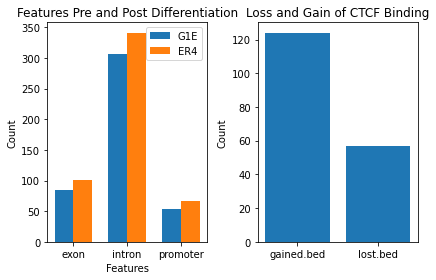

In [34]:
label = ["exon","intron","promoter"]
x = np.arange(len(label))  # the label locations
width = 0.35
fig, ax = plt.subplots(ncols=2)

rects1 = ax[0].bar(x - width/2, G1efeaturecount['g_count'], width, label='G1E')
rects2 = ax[0].bar(x + width/2, ER4featurecount['e_count'], width, label='ER4')

ax[0].set_title('Features Pre and Post Differentiation')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Count')
ax[0].set_xticks(x)
ax[0].set_xticklabels(label)
ax[0].legend()

ax[1].bar(lg["characteristic"],lg['counts'])
ax[1].set_title('Loss and Gain of CTCF Binding')
ax[1].set_ylabel('Count')

fig.tight_layout()

## Part 2: Motif discovery

In [35]:
! conda install meme -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/cmdb/miniconda3/envs/cmdb

  added / updated specs:
    - meme


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxslt-1.1.33             |       h320ff13_0         526 KB  conda-forge
    meme-5.1.1                 |py36pl526h5a27e97_3        12.4 MB  bioconda
    mpi-1.0                    |          openmpi           4 KB  conda-forge
    openmpi-4.0.5              |       hebb22fb_0         3.0 MB  conda-forge
    perl-common-sense-3.74     |          pl526_2          15 KB  bioconda
    perl-dbi-1.642             |          pl526_0         543 KB  bioconda
    perl-file-which-1.23       |          pl526_0          12 KB  bioconda
    perl

In [ ]:
tar -xvzf motif_databases.12.19.tgz  #unzip file 

In [ ]:
sort -nr -k7 ER4_peaks.narrowPeak | head -n 100 > top100.narrowPeak 
sort -nr -k8 ER4_peaks.narrowPeak | head -n 100 > top100.narrowPeak 
#sort based on numerical value in reverse order (largest to smallest) (-nr) and take the 7th field/coumn (-k7) which is the enrichment value 
#using the 8th field which is based on P-value also works and gives the same results
#take first 100 rows and put in new bed file 

In [ ]:
bedtools getfasta -fi index/chr19.fa -bed top100.narrowPeak > CTCFtop100.fasta

In [ ]:
meme-chip -ccut -meme-maxw 20 -db motif_databases/JASPAR/JASPAR_CORE_2016.meme CTCFtop100.fasta

In [ ]:
# downloaded the motif with the lowest p-value from the html link present in the memechip_out subdirectory memetomtom_out

In [ ]:
epstopdf logo.eps  